Dataset Sample:
    USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0

Average Revenue by Group:
 VARIANT_NAME
control    0.129013
variant    0.070070
Name: REVENUE, dtype: float64


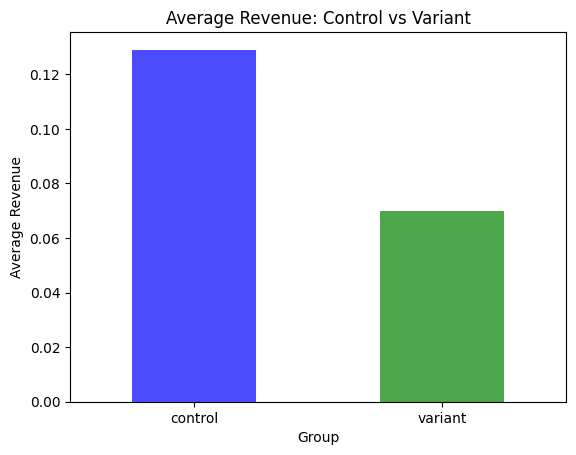


T-Test Results:
T-Statistic: 1.268403803110966
P-Value: 0.20469713432410777

Conclusion: No statistically significant difference found between the two groups.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df = pd.read_csv('AB_Test_Results.csv')
print("Dataset Sample:\n", df.head())

# Check for null values
if df.isnull().sum().any():
    print("\nWarning: Dataset contains null values. Cleaning the data...")
    df.dropna(inplace=True)

# Group-wise Revenue
group_revenue = df.groupby("VARIANT_NAME")["REVENUE"].mean()
print("\nAverage Revenue by Group:\n", group_revenue)

# Visualizing Revenue by Group
group_revenue.plot(kind="bar", color=["blue", "green"], alpha=0.7)
plt.title("Average Revenue: Control vs Variant")
plt.xlabel("Group")
plt.ylabel("Average Revenue")
plt.xticks(rotation=0)
plt.show()

# Statistical Significance Test
control_group = df[df["VARIANT_NAME"] == "control"]["REVENUE"]
variant_group = df[df["VARIANT_NAME"] == "variant"]["REVENUE"]

# Perform an independent t-test
t_stat, p_value = ttest_ind(control_group, variant_group, equal_var=False)

# Displaying the test results
print("\nT-Test Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Conclusion
if p_value < 0.05:
    print("\nConclusion: There is a statistically significant difference between the two groups.")
else:
    print("\nConclusion: No statistically significant difference found between the two groups.")
